**Wichtig**:  
* Die einzulesenen Datensätze "process_data_df10.csv" und "process_data_df10.pkl" sollen im Ordner "../Data/" sein!
* Alle in diesem Notebook erzeugten Dateien werden auch in "..Data/" gespeichert.


**Notwendige Packages**: numpy, pandas, re, matplotlib, mpu

---

**Important**: 
* The dataframes "process_data_df10" and "process_data_df10.pkl" have to be in the folder "../Data"!
* All the files produced by this notebook will also be saved in "..Data/"


**Necessary Packages**: numpy, pandas, re, matplotlib, mpu


2nd Project part: Feature Engineering and Data Modeling
===

__Data Analytics für Chemieingenieure und Chemiker__

Tino Mundt, M. Sc.

Prof. Dr. Reinhard Schomäcker

__Group C:__

Frank Rudolf Hilden 364571 - Giam Chon Lee 400646 - Philippe Samuel Santos da Costa 369810 - Julian Felipe Torres Campos 402424 - Elron Elias Pens 371555

__26.01.2020__

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hinzufügen-neuer-Informationen" data-toc-modified-id="Hinzufügen-neuer-Informationen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hinzufügen neuer Informationen</a></span><ul class="toc-item"><li><span><a href="#Einlesen-der-daten" data-toc-modified-id="Einlesen-der-daten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Einlesen der daten</a></span></li><li><span><a href="#Entfernen-von-Reihen-ohne-Produktnamen" data-toc-modified-id="Entfernen-von-Reihen-ohne-Produktnamen-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Entfernen von Reihen ohne Produktnamen</a></span></li><li><span><a href="#Hinzufügen-der-absoluten-und-relativen-Sollwerte" data-toc-modified-id="Hinzufügen-der-absoluten-und-relativen-Sollwerte-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hinzufügen der absoluten und relativen Sollwerte</a></span></li><li><span><a href="#Speichern-als-.csv" data-toc-modified-id="Speichern-als-.csv-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Speichern als .csv</a></span></li></ul></li><li><span><a href="#Varianz-pro-Produkt" data-toc-modified-id="Varianz-pro-Produkt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Varianz pro Produkt</a></span><ul class="toc-item"><li><span><a href="#Removing-unnecessary-columns" data-toc-modified-id="Removing-unnecessary-columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Removing unnecessary columns</a></span></li><li><span><a href="#Exploring-p_product,-p_product_type-and-p_product_group" data-toc-modified-id="Exploring-p_product,-p_product_type-and-p_product_group-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploring <code>p_product</code>, <code>p_product_type</code> and <code>p_product_group</code></a></span></li></ul></li><li><span><a href="#Heat-maps" data-toc-modified-id="Heat-maps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Heat maps</a></span></li><li><span><a href="#Fragestellung:-relative-Abweichung-zwischen-Soll--und-Istwert->-5%-für-einzelne-Produkte.-Liegt-die-Ursache-in-einer-&quot;empfindlichen&quot;-Chemie-oder-in-der-Technik-begründet?-->-Erzeugung-eines-Dentrogrammes,-bei-größerem-Einfluss-des-Faktors-&quot;Chemie&quot;-sollten-die-einzelnen-Produkte-in-einem-Dentrogramm-nah-beeinander-gruppiert-sein." data-toc-modified-id="Fragestellung:-relative-Abweichung-zwischen-Soll--und-Istwert->-5%-für-einzelne-Produkte.-Liegt-die-Ursache-in-einer-&quot;empfindlichen&quot;-Chemie-oder-in-der-Technik-begründet?-->-Erzeugung-eines-Dentrogrammes,-bei-größerem-Einfluss-des-Faktors-&quot;Chemie&quot;-sollten-die-einzelnen-Produkte-in-einem-Dentrogramm-nah-beeinander-gruppiert-sein.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fragestellung: relative Abweichung zwischen Soll- und Istwert &gt; 5% für einzelne Produkte. Liegt die Ursache in einer "empfindlichen" Chemie oder in der Technik begründet? -&gt; Erzeugung eines Dentrogrammes, bei größerem Einfluss des Faktors "Chemie" sollten die einzelnen Produkte in einem Dentrogramm nah beeinander gruppiert sein.</a></span><ul class="toc-item"><li><span><a href="#Um-unterschiedliche-Produkte-miteinander-vergleichen-zu-können,-müssen-Prozessgrößen-normiert-werden" data-toc-modified-id="Um-unterschiedliche-Produkte-miteinander-vergleichen-zu-können,-müssen-Prozessgrößen-normiert-werden-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Um unterschiedliche Produkte miteinander vergleichen zu können, müssen Prozessgrößen normiert werden</a></span></li><li><span><a href="#Einlesen-der-Daten" data-toc-modified-id="Einlesen-der-Daten-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Einlesen der Daten</a></span></li><li><span><a href="#Vorbereiten-des-Datensatzes-für-die-Normierung" data-toc-modified-id="Vorbereiten-des-Datensatzes-für-die-Normierung-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Vorbereiten des Datensatzes für die Normierung</a></span><ul class="toc-item"><li><span><a href="#Entfernen-von-Spalten,-die-entweder-keine-Prozessgrößen-während-der-Produktion-waren-(_ref,-_richtwert)-oder-in-denen-keine-fehlerhaften/abweichenden-Prozessgrößen-enthalten-sein-können-(_median)" data-toc-modified-id="Entfernen-von-Spalten,-die-entweder-keine-Prozessgrößen-während-der-Produktion-waren-(_ref,-_richtwert)-oder-in-denen-keine-fehlerhaften/abweichenden-Prozessgrößen-enthalten-sein-können-(_median)-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Entfernen von Spalten, die entweder keine Prozessgrößen während der Produktion waren (_ref, _richtwert) oder in denen keine fehlerhaften/abweichenden Prozessgrößen enthalten sein können (_median)</a></span></li><li><span><a href="#Entfernen-von-Spalten,-die-zwar-typ:-int-oder-typ:-float-sind,-deren-Normierung-jedoch-physikalisch-nicht-sinnvoll-ist" data-toc-modified-id="Entfernen-von-Spalten,-die-zwar-typ:-int-oder-typ:-float-sind,-deren-Normierung-jedoch-physikalisch-nicht-sinnvoll-ist-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Entfernen von Spalten, die zwar typ: int oder typ: float sind, deren Normierung jedoch physikalisch nicht sinnvoll ist</a></span></li><li><span><a href="#Mittelung-von-Spalten,-welche-dieselbe-Prozessgröße-innerhalb-einer-Charge-beschreiben,-allerdings-an-unterschiedlichen-Positionen-gemessen" data-toc-modified-id="Mittelung-von-Spalten,-welche-dieselbe-Prozessgröße-innerhalb-einer-Charge-beschreiben,-allerdings-an-unterschiedlichen-Positionen-gemessen-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Mittelung von Spalten, welche dieselbe Prozessgröße innerhalb einer Charge beschreiben, allerdings an unterschiedlichen Positionen gemessen</a></span><ul class="toc-item"><li><span><a href="#Verfälschen-das-Ergebnis-des-Clusterings,-da-diese-Prozessgröße-im-Vergleich-zu-einder-anderen-mehrfach-mit-berücksichtigt-werden-würde" data-toc-modified-id="Verfälschen-das-Ergebnis-des-Clusterings,-da-diese-Prozessgröße-im-Vergleich-zu-einder-anderen-mehrfach-mit-berücksichtigt-werden-würde-4.3.3.1"><span class="toc-item-num">4.3.3.1&nbsp;&nbsp;</span>Verfälschen das Ergebnis des Clusterings, da diese Prozessgröße im Vergleich zu einder anderen mehrfach mit berücksichtigt werden würde</a></span></li><li><span><a href="#Identifizierung-einer-Charge" data-toc-modified-id="Identifizierung-einer-Charge-4.3.3.2"><span class="toc-item-num">4.3.3.2&nbsp;&nbsp;</span>Identifizierung einer Charge</a></span></li><li><span><a href="#Mittelung" data-toc-modified-id="Mittelung-4.3.3.3"><span class="toc-item-num">4.3.3.3&nbsp;&nbsp;</span>Mittelung</a></span></li></ul></li><li><span><a href="#Typfilterung" data-toc-modified-id="Typfilterung-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Typfilterung</a></span></li></ul></li><li><span><a href="#Normierung" data-toc-modified-id="Normierung-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Normierung</a></span></li><li><span><a href="#Auswählen-der-Daten-und-Erzeugung-eines-Dentrogrammes" data-toc-modified-id="Auswählen-der-Daten-und-Erzeugung-eines-Dentrogrammes-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Auswählen der Daten und Erzeugung eines Dentrogrammes</a></span><ul class="toc-item"><li><span><a href="#Salzrückhalt" data-toc-modified-id="Salzrückhalt-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Salzrückhalt</a></span><ul class="toc-item"><li><span><a href="#Filterkriterium" data-toc-modified-id="Filterkriterium-4.5.1.1"><span class="toc-item-num">4.5.1.1&nbsp;&nbsp;</span>Filterkriterium</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Hinzufügen neuer Informationen
Zuerst werden die Reihen ohne Produktnamen aus dem bereits bereinigten Datensatz entfernt. Anschließend werden die absolute und relative Sollwerte für Salzrückhalt und Permeatdurchfluss hinzugefügt. Diese Werte sind in der offiziellen Lawabrane - Broschüre zu finden


### Einlesen der daten

In [54]:
import pandas as pd
import numpy as np
import csv
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from datetime import date, datetime

In [55]:
# Daten einlesen
df=pd.read_csv("./Data/process_data_df10.csv", header=[0,1], na_values=['nan'], sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

C:\Users\PhilippeSamuel\Anaconda3\envs\da_chem\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

                                                     \
  ps_dicke_4 ps_dicke_bs ps_raum_temperatur_start_c   
0      135.0       134.0                       24.0   
1      135.0       134.0                       24.0   
2      135.0       134.0                       24.0   
3      135.0       134.0                       24.0   
4      135.0       134.0                       24.0   

                                                             \
  ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
0                               19.0                   19.7   
1                               19.0                   19.7   
2                               19.0                   19.7   
3                               19.0                   19.7   
4                               19.0                   19.7   

                                                      \
  ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
0                     20.6                      21.1   
1                     20.6                      21.1   
2                     20.6                      21.1   
3                     20.6                      21.1   
4                     20.6                      21.1   

                                                       \
  ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
0                      21.6                      22.0   
1                      21.6                      22.0   
2                      21.6                      22.0   
3                      21.6                      22.0   
4                      21.6                      22.0   

                                                       \
  ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
0                      22.2                      22.5   
1                      22.2                      22.5   
2                      22.2                      22.5   
3                      22.2                      22.5   
4                      22.2                      22.5   

                                                       \
  ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
0                      22.6                      22.9   
1                      22.6                      22.9   
2                      22.6                      22.9   
3                      22.6                      22.9   
4                      22.6                      22.9   

                                                                  \
  ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
0                         57.0                              78.0   
1                         57.0                              78.0   
2                         57.0                              78.0   
3                         57.0                              78.0   
4                         57.0                              78.0   

                                                        

### Entfernen von Reihen ohne Produktnamen

In [56]:
# Zu Beginn alle im DataFrame vorkommenden Produktnamen auslesen
produktnamen=list(df2['qc']['p_product_full_name'])

In [57]:
# Erzeugen eines Arrays, in welches die Sollwerte gemäß Herstellerangaben eingetragen werden
sollwerte=np.zeros((118687,2))

In [58]:
# Info zu df2 vor dem Bereinigen
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118687 entries, 0 to 118686
Columns: 343 entries, (ps, ps) to (qc, roll_position)
dtypes: bool(7), float64(296), int64(4), object(36)
memory usage: 305.0+ MB


In [59]:
# Produktnamen laut Herstellerangaben
# Stimmt der Produktname überein, werden die Sollwerte für den Salrückhalt (linke Spalte) und den Permatdurchsatz (rechte Spalte) eingetragen
# leere Spalten werden in der else-Bedingung aussortiert

for i in range(len(produktnamen)):
    if produktnamen[i]=='a79cf6a73839':
        sollwerte[i]=[99.8, 5.2]
        
    elif produktnamen[i]=='c807697b3c7e':
        sollwerte[i]=[99.8, 24.6]
        
    elif produktnamen[i]=='f22a7fef71c5':
        sollwerte[i]=[99.8, 27.3] 
        
    elif produktnamen[i]=='c13b2f69d3c1':
        sollwerte[i]=[99.8, 7.2]  
        
    elif produktnamen[i]=='3e94b7067349':
        sollwerte[i]=[99.8, 34.1]  
        
    elif produktnamen[i]=='3394d82edc97':
        sollwerte[i]=[99.8, 37.5]  
        
    elif produktnamen[i]=='df9e75b29918':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='316c8d1ffca1':
        sollwerte[i]=[99.5, 43.9]  
        
    elif produktnamen[i]=='5661014763c8':
        sollwerte[i]=[99.5, 8.9]  
        
    elif produktnamen[i]=='73928f2577b5':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='22227b31350f':
        sollwerte[i]=[99.5, 41.5]  
        
    elif produktnamen[i]=='df1d09e643af':
        sollwerte[i]=[99.7, 8.9]  
        
    elif produktnamen[i]=='e2b1e6e1d5f5':
        sollwerte[i]=[99.7, 37.9]  
        
    elif produktnamen[i]=='54b98d0fe2eb':
        sollwerte[i]=[99.5, 41.7]
        
    elif produktnamen[i]=='ff16223eb2bf':
        sollwerte[i]=[99.5, 39.9]
        
    elif produktnamen[i]=='0cc0ba87b12f':
        sollwerte[i]=[99.5, 7.4]        
        
    elif produktnamen[i]=='a640f68db89c':
        sollwerte[i]=[99.5, 34.8]        
        
    elif produktnamen[i]=='b3ccc5e5f9b5':
        sollwerte[i]=[99.5, 36.2]        
        
    elif produktnamen[i]=='2256f65c362b':
        sollwerte[i]=[99.5, 38.3]        
        
    elif produktnamen[i]=='33d21930e431':
        sollwerte[i]=[99.5, 8.2]        
        
    elif produktnamen[i]=='3a0c28c7fc8c':
        sollwerte[i]=[99.5, 38.6]                
        
    elif produktnamen[i]=='630448a85ca3':
        sollwerte[i]=[99.5, 42.6]
    else:
        print(i)
        df2=df2.drop(df2.index[i])
        
        

9723
11598
15501
17752
32413
39389
49116
55882
68301
68491
77866
80634
88800
99333
101312
115985
117371


In [60]:
# Info zu df2 nach dem Bereinigen
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118670 entries, 0 to 118686
Columns: 343 entries, (ps, ps) to (qc, roll_position)
dtypes: bool(7), float64(296), int64(4), object(36)
memory usage: 305.9+ MB


### Hinzufügen der absoluten und relativen Sollwerte

In [61]:
# Erzeugen eines Backups
sollwerte_b=np.copy(sollwerte)
sollwerte_b

array([[99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2],
       ...,
       [99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2]])

In [62]:
# Sollwerte als Array auslesen:
# sollwerte2=Salrückhalt
# sollwerte3=Permatdurchfluss
sollwerte2=sollwerte_b[:,0]
sollwerte3=sollwerte_b[:,1]

In [63]:
# Typvereinfachung -> Teilen einer Liste durch eine Liste (später)
sollwerte_salzr=sollwerte2.tolist()
sollwerte_durchf=sollwerte3.tolist()

In [64]:
# Erneut Überprüfen, ob keine leeren Einträge vorhanden sind
sollwerte_salzr=list(filter(lambda a: a!=0, sollwerte_salzr))
sollwerte_durchf=list(filter(lambda a: a!=0, sollwerte_durchf))

In [65]:
# istwerte als Liste auslesen
ist_salzr=df2['qc']['qc_salzrckhalt']
ist_durchf=df2['qc']['qc_durchfluss']

In [66]:
# relative Abweichung berechnen
# negative %-Zahl: weniger als Sollwert; positive %-Zahl: mehr als der Sollwert
Abw_salzr=(ist_salzr-sollwerte_salzr)/sollwerte_durchf*100
Abw_durchf=(ist_durchf-sollwerte_durchf)/sollwerte_durchf*100

In [67]:
# Hinzufügen der Sollwerte zum DataFrame
df2['Sollwerte','soll_salzr_abs']=sollwerte_salzr
df2['Sollwerte','soll_permeatd_abs']=sollwerte_durchf
df2['Sollwerte', 'soll_salzr_rel']=Abw_salzr
df2['Sollwerte', 'soll_permeatd_rel']=Abw_durchf

In [68]:
df2.head()

ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

                                                     \
  ps_dicke_4 ps_dicke_bs ps_raum_temperatur_start_c   
0      135.0       134.0                       24.0   
1      135.0       134.0                       24.0   
2      135.0       134.0                       24.0   
3      135.0       134.0                       24.0   
4      135.0       134.0                       24.0   

                                                             \
  ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
0                               19.0                   19.7   
1                               19.0                   19.7   
2                               19.0                   19.7   
3                               19.0                   19.7   
4                               19.0                   19.7   

                                                      \
  ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
0                     20.6                      21.1   
1                     20.6                      21.1   
2                     20.6                      21.1   
3                     20.6                      21.1   
4                     20.6                      21.1   

                                                       \
  ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
0                      21.6                      22.0   
1                      21.6                      22.0   
2                      21.6                      22.0   
3                      21.6                      22.0   
4                      21.6                      22.0   

                                                       \
  ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
0                      22.2                      22.5   
1                      22.2                      22.5   
2                      22.2                      22.5   
3                      22.2                      22.5   
4                      22.2                      22.5   

                                                       \
  ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
0                      22.6                      22.9   
1                      22.6                      22.9   
2                      22.6                      22.9   
3                      22.6                      22.9   
4                      22.6                      22.9   

                                                                  \
  ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
0                         57.0                              78.0   
1                         57.0                              78.0   
2                         57.0                              78.0   
3                         57.0                              78.0   
4                         57.0                              78.0   

                                                        

In [69]:
df2['Sollwerte']

,soll_salzr_abs,soll_permeatd_abs,soll_salzr_rel,soll_permeatd_rel
0,99.5,36.2,-0.123927,1.707208
1,99.5,36.2,0.083994,1.621790
2,99.5,36.2,0.064419,0.273103
3,99.5,36.2,0.186600,-0.425610
4,99.5,36.2,0.213790,0.307515
...,...,...,...,...
118682,99.5,36.2,-0.262752,-8.737486
118683,99.5,36.2,-0.129304,-10.007924
118684,99.5,36.2,-0.255097,-11.920763
118685,99.5,36.2,-0.041934,-4.767057


### Speichern als .csv

In [70]:
df2.to_pickle('./Data/process_data_df11.pkl')

## Varianz pro Produkt

In this section the scattering of the salt retention (`qc_salzrckhalt`) is analysed. Then the results will be plotted for each of the 22 product lines. 
The question to be answerd is:
> Is there a difference in the distribution of the salt retention (`qc_salzrckhalt`) among the different product lines?

In [71]:
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [6,5]
pd.options.display.max_columns = None
sns.set(style="ticks", color_codes=True)

In [72]:
df = pd.read_pickle('./Data/process_data_df10.pkl')

### Removing unnecessary features (columns)
`pa_coating` is a dummy variable and doesn't belong to the original collected data. For further analysis it can be dropped. Additionaly features containing more than 90% of missing values can also be removed.

In [73]:
n_rows = df.shape[0]
# select columns that have more than 90% of missing values
manyNaNs = [col[1] for col in df.columns if df[col].isna().sum()/n_rows > 0.9]

colsToRemove = ['pa_coating'] + manyNaNs

# drop the selected columns
df1 = df.copy()
df1.drop(labels=colsToRemove,axis='columns',level=1,inplace=True)

# Let's check whether the variables where succesfully removed:

# Check if any elements of colsToRemove is in df
print('Are any of the `colsToRemove` in `df`?')
print('  ',any([i for i in colsToRemove if i in df.columns.get_level_values(level=1)]))
print('\n')

# Check if any elements of colsToRemove is in df1
print('Are any of the `colsToRemove` in `df1`?')
print('  ',any([i for i in colsToRemove if i in df1.columns.get_level_values(level=1)]))

Are any of the `colsToRemove` in `df`?
   True


Are any of the `colsToRemove` in `df1`?
   False


### Removing incorrect observations (rows)

It is assumed that zero values of `qc_salzrckhalt` or `qc_durchfluss` were actually not measured. Hence these observations can also be ignored.

In [74]:
df2 = df1.copy()
# Removes the first level of the multiindex 
df2 = df2.droplevel(level= 0, axis='columns')
# Remove observations where `qc_salzrckhalt` == 0 or `qc_durchfluss` == 0
df2.query('qc_salzrckhalt>0 & qc_durchfluss>0',inplace=True)

A quick check on the `dtypes` of our DataFrame:

In [75]:
df2.dtypes.value_counts()

float64                294
object                  15
datetime64[ns, UTC]     10
datetime64[ns]           9
bool                     7
int64                    4
category                 1
dtype: int64

### Exploring `p_product`, `p_product_type` and `p_product_group` 
Now we could keep removing unnecessary columns, but let's focus on the feature we want to keep/analyse. 

The 1st question is: 
> Do the features `qc_salzrckhalt` and `qc_durchfluss` vary significantly among different `p_product`, `p_product_type` and `p_product_group`? 

In [77]:
# Columns by which to group 
groupCols = ['p_product_group','p_product_type','p_product']
# Goal columns to be analysed
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

# Select just a few features for analysis
XY = df2.loc[:,['nr'] + groupCols + goalCols]

Group by the `groupCols`, then get some descriptive statistics. Since we are mostly interested on the `mean` and `standard deviation`, let us slice these statistics: 

In [78]:
XY_describe=(XY
 .groupby(groupCols)[goalCols]
 .describe(percentiles=[.5])
 .loc[:,(slice(None),['mean','std'])]
)

XY_describe.sort_values(by=[('qc_salzrckhalt','std')], ascending=False)

# Or more generally:
# groupCols = ['p_product_group','p_product_type','p_product']
# goalCols  = ['qc_salzrckhalt','qc_durchfluss']

# (XY
#  .groupby(groupCols)[goalCols]
#  .describe()
# )

qc_salzrckhalt            \
                                                           mean       std   
p_product_group     p_product_type p_product                                
Brackwasserelemente c77cb1692e0e   B400 ULP ASD       99.447599  2.260389   
                                   B440 ULP           99.487571  2.190241   
                    f8ba29e9058b   B400 FR            99.698430  0.943967   
                    6d2830b1e76d   B085 HF 4040       99.747199  0.851215   
                    6989995295da   B400 LE            99.597574  0.817313   
                                   B440 LE            99.655607  0.705622   
                    6d2830b1e76d   B400 HF            99.725208  0.606740   
                    f8ba29e9058b   B085 FR 4040       99.751843  0.569136   
                    6989995295da   B085 LE 4040       99.587711  0.558698   
                    f187928fdb22   B370 FR            99.754400  0.531778   
                    6d2830b1e76d   B440 HF            99.709252  0.423277   
                    6989995295da   B400 LE ASD        99.594492  0.408559   
Seewasserelemente   320144db7b4b   S085 HF 4040       99.593242  0.322570   
                    cd7216b44ce3   S400 HR            99.550429  0.283806   
Brackwasserelemente 5200bdfc01a1   B440 HP            99.680525  0.274059   
Seewasserelemente   320144db7b4b   S440 HF            99.564647  0.250485   
                    cd7216b44ce3   S085 HR 4040       99.622799  0.192800   
Brackwasserelemente 5200bdfc01a1   B400 HP            99.710801  0.178502   
                    c77cb1692e0e   B085 ULP 4040      99.481307  0.127754   
Seewasserelemente   cd7216b44ce3   S440 HR            99.673094  0.126316   
                    320144db7b4b   S400 HF            99.661606  0.121766   
Brackwasserelemente f187928fdb22   B400 FR ASD        99.778475  0.111351   

                                                 qc_durchfluss            
                                                          mean       std  
p_product_group     p_product_type p_product                              
Brackwasserelemente c77cb1692e0e   B400 ULP ASD      41.915975  6.179667  
                                   B440 ULP          46.233789  6.493993  
                    f8ba29e9058b   B400 FR           45.075786  5.419690  
                    6d2830b1e76d   B085 HF 4040      10.217395  1.450472  
                    6989995295da   B400 LE           36.109638  2.457657  
                                   B440 LE           41.042630  4.313453  
                    6d2830b1e76d   B400 HF           45.837838  5.614436  
                    f8ba29e9058b   B085 FR 4040      10.180787  1.228733  
                    6989995295da   B085 LE 4040       7.868664  0.783317  
                    f187928fdb22   B370 FR           40.967887  3.688570  
                    6d2830b1e76d   B440 HF           47.629521  4.765416  
                    6989995295da   B400 LE ASD       38.475563  3.242915  
Seewasserelemente   320144db7b4b   S085 HF 4040       7.158628  0.425344  
                    cd7216b44ce3   S400 HR           28.270457  4.239466  
Brackwasserelemente 5200bdfc01a1   B440 HP           54.348608  6.059473  
Seewasserelemente   320144db7b4b   S440 HF           39.709322  3.077885  
                    cd7216b44ce3   S085 HR 4040       6.344866  0.827814  
Brackwasserelemente 5200bdfc01a1   B400 HP           47.430731  4.933277  
                    c77cb1692e0e   B085 ULP 4040      8.316075  0.941071  
Seewasserelemente   cd7216b44ce3   S440 HR           25.871263  1.561641  
                    320144db7b4b   S400 HF           34.972416  5.160947  
Brackwasserelemente f187928fdb22   B400 FR ASD       46.994425  2.782082

Which product line shows the highest standard deviation for the salt retention (`qc_salzrckhalt`)?

In [79]:
XY_describe.loc[[XY_describe['qc_salzrckhalt','std'].idxmax()],:]

qc_salzrckhalt            \
                                                          mean       std   
p_product_group     p_product_type p_product                               
Brackwasserelemente c77cb1692e0e   B400 ULP ASD      99.447599  2.260389   

                                                qc_durchfluss            
                                                         mean       std  
p_product_group     p_product_type p_product                             
Brackwasserelemente c77cb1692e0e   B400 ULP ASD     41.915975  6.179667

Which product line shows the highest standard deviation for the flow rate (`qc_durchfluss`)?

In [80]:
XY_describe.loc[[XY_describe['qc_durchfluss','std'].idxmax()],:]


qc_salzrckhalt            \
                                                       mean       std   
p_product_group     p_product_type p_product                            
Brackwasserelemente c77cb1692e0e   B440 ULP       99.487571  2.190241   

                                             qc_durchfluss            
                                                      mean       std  
p_product_group     p_product_type p_product                          
Brackwasserelemente c77cb1692e0e   B440 ULP      46.233789  6.493993

In the following plot one can see that there ist a slightly higher scattering of the `salt retention` for the product group `Brackwasserelemente` when compared to `Seewasserelemente`. (Note that the y axis is not scaled from 0 to 100%). 

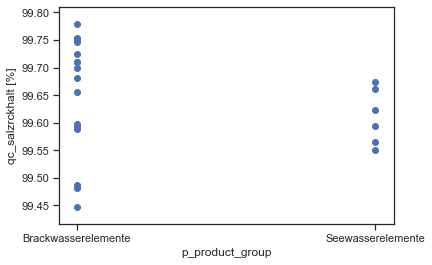

In [81]:
fig1 = plt.figure(figsize=[6,4])
plt.scatter(XY_describe.index.get_level_values(level='p_product_group'),XY_describe['qc_salzrckhalt']['mean'])
plt.xlabel('p_product_group')
plt.ylabel('qc_salzrckhalt [%]')
plt.show()

In the following plots one can observe the difference in the scattering of the different product lines. The products `B400 ULP ASD` and `B440 ULP` show the highest standard deviation fro both `salt retention` and `flow rate` and shoulb be analysed more carefully. 

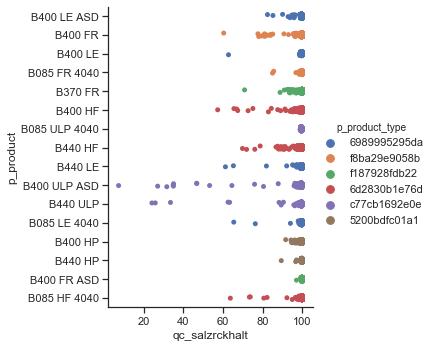

In [82]:
#sns.catplot(y='p_product_type',x='qc_salzrckhalt',hue='p_product_group',data=XY)
sns.catplot(y='p_product',x='qc_salzrckhalt',hue='p_product_type',data=XY[XY['p_product_group'] == 'Brackwasserelemente'])
plt.show()

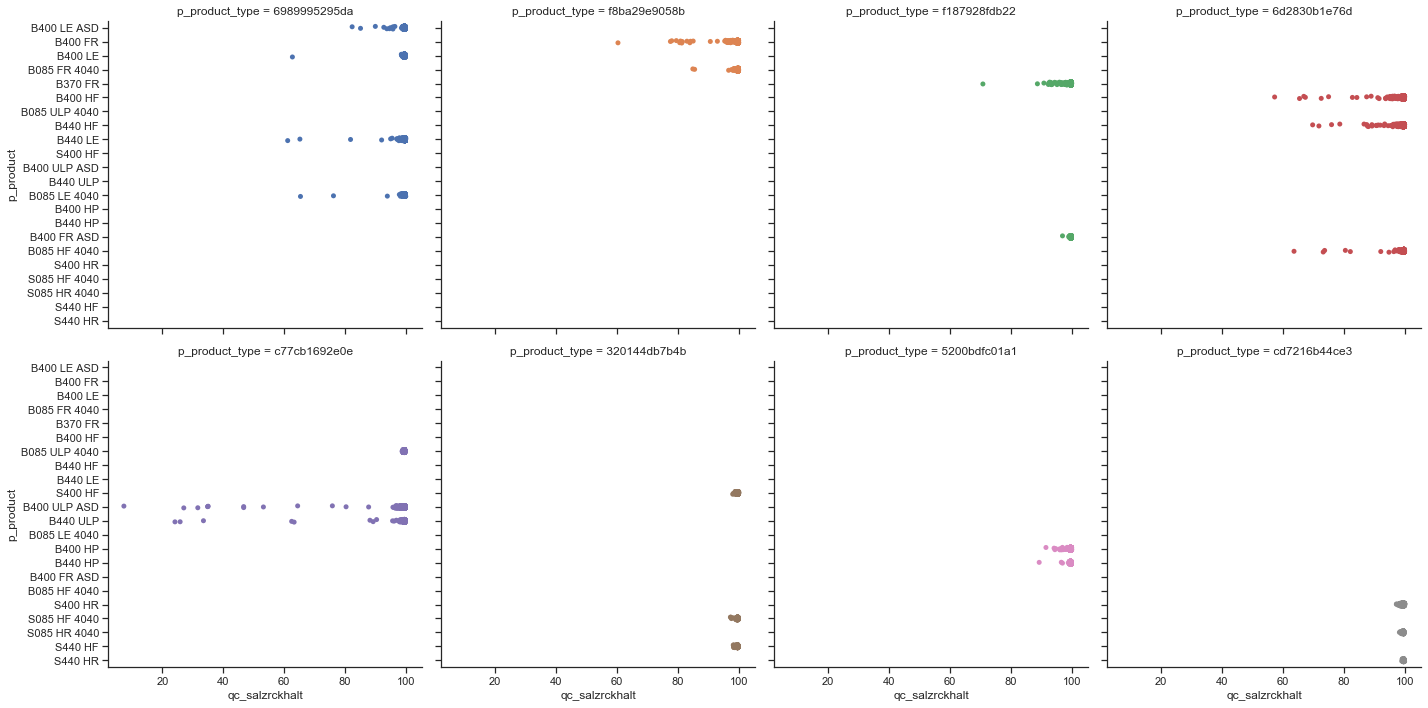

In [83]:
(XY
 .dropna()                   # drop missing values
 .pipe((sns.catplot,'data'),
       y='p_product',x='qc_salzrckhalt',col='p_product_type',col_wrap = 4,hue='p_product_type',kind='strip'))

plt.show()

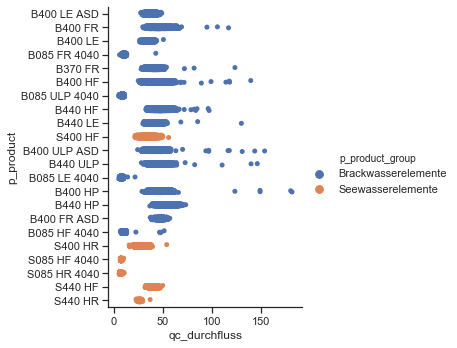

In [84]:
(XY
 .dropna()
 .pipe((sns.catplot,'data'),
       x='qc_durchfluss',y='p_product',hue='p_product_group'))
plt.show()

## Heat maps

In [85]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import sklearn
import csv

In [90]:
# Daten einlesen
df=pd.read_pickle("./Data/process_data_df11.pkl")#, header=[0,1], na_values=['nan'], sep=',',low_memory=False)

# Spalte ohne Information löschen
# df2=df.drop(['Unnamed: 0_level_0'],axis=1)

df2 = df.copy()
df2.head()

ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

                                                     \
  ps_dicke_4 ps_dicke_bs ps_raum_temperatur_start_c   
0      135.0       134.0                       24.0   
1      135.0       134.0                       24.0   
2      135.0       134.0                       24.0   
3      135.0       134.0                       24.0   
4      135.0       134.0                       24.0   

                                                             \
  ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
0                               19.0                   19.7   
1                               19.0                   19.7   
2                               19.0                   19.7   
3                               19.0                   19.7   
4                               19.0                   19.7   

                                                      \
  ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
0                     20.6                      21.1   
1                     20.6                      21.1   
2                     20.6                      21.1   
3                     20.6                      21.1   
4                     20.6                      21.1   

                                                       \
  ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
0                      21.6                      22.0   
1                      21.6                      22.0   
2                      21.6                      22.0   
3                      21.6                      22.0   
4                      21.6                      22.0   

                                                       \
  ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
0                      22.2                      22.5   
1                      22.2                      22.5   
2                      22.2                      22.5   
3                      22.2                      22.5   
4                      22.2                      22.5   

                                                       \
  ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
0                      22.6                      22.9   
1                      22.6                      22.9   
2                      22.6                      22.9   
3                      22.6                      22.9   
4                      22.6                      22.9   

                                                                  \
  ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
0                         57.0                              78.0   
1                         57.0                              78.0   
2                         57.0                              78.0   
3                         57.0                              78.0   
4                         57.0                              78.0   

                                                        

In [91]:
df3=df2.copy()

In [92]:
df3=df3.select_dtypes(include=['float64','int'])

In [93]:
df3=df3[(df3['Sollwerte']['soll_salzr_rel']<-10) & (df3['Sollwerte']['soll_salzr_rel']>-100)]

In [94]:
df3_ps=df3.drop(columns=['pa','ass','qc'])
df3_pa=df3.drop(columns=['ps','ass','qc'])
df3_ass=df3.drop(columns=['ps','pa','qc'])
df3_qc=df3.drop(columns=['ps','pa','ass'])
df3_ps.head()

C:\Users\PhilippeSamuel\Anaconda3\envs\da_chem\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                  \
     ps_beschichtete_rollenlange_m ps_c_losung_wt_% ps_gap_micro_m   
1239                        4496.0             31.0          250.0   
2109                        4512.0             31.0          250.0   
2633                        4460.0             31.0          250.0   
4156                        4485.0             31.0          250.0   
6647                        4524.0             31.0          250.0   

                                                                      \
     ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3 ps_dicke_4   
1239               138.0      138.0      135.0      135.0      133.0   
2109               135.0      135.0      133.0      133.0      132.0   
2633               137.0      135.0      136.0      135.0      135.0   
4156               137.0      136.0      135.0      136.0      135.0   
6647               138.0      137.0      137.0      136.0      136.0   

                                             \
     ps_dicke_bs ps_raum_temperatur_start_c   
1239       132.0                       24.0   
2109       133.0                       24.0   
2633       136.0                       24.5   
4156       134.0                       24.0   
6647       136.0                       23.0   

                                                                \
     ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
1239                               19.0                   19.1   
2109                               19.0                   21.4   
2633                               19.5                   20.4   
4156                               19.0                   21.5   
6647                               18.0                   18.3   

                                                         \
     ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
1239                     20.4                      21.1   
2109                     22.2                      22.3   
2633                     20.7                      21.4   
4156                     22.3                      22.5   
6647                     21.1                      21.7   

                                                          \
     ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
1239                      21.6                      22.1   
2109                      22.9                      23.3   
2633                      21.9                      22.1   
4156                      22.7                      22.8   
6647                      22.5                      22.2   

                                                          \
     ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
1239                      22.0                      22.2   
2109                      23.4                      23.8   
2633                      22.3                      22.3   
4156                      22.9                      23.0   
6647                      22.2                      22.2   

                                                          \
     ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
1239                      22.3                      22.0   
2109                      23.5                      23.3   
2633                      22.3                      22.3   
4156                      23.1                      23.2   
6647                      22.2                      22.3   

                                                                     \
     ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
1239                         59.0                              76.0   
2109                         49.0                              49.0   
2633                         49.0                              62.0   
4156                         56.0                              63.0   
6647                         47.0                              54.0   

                                                                    

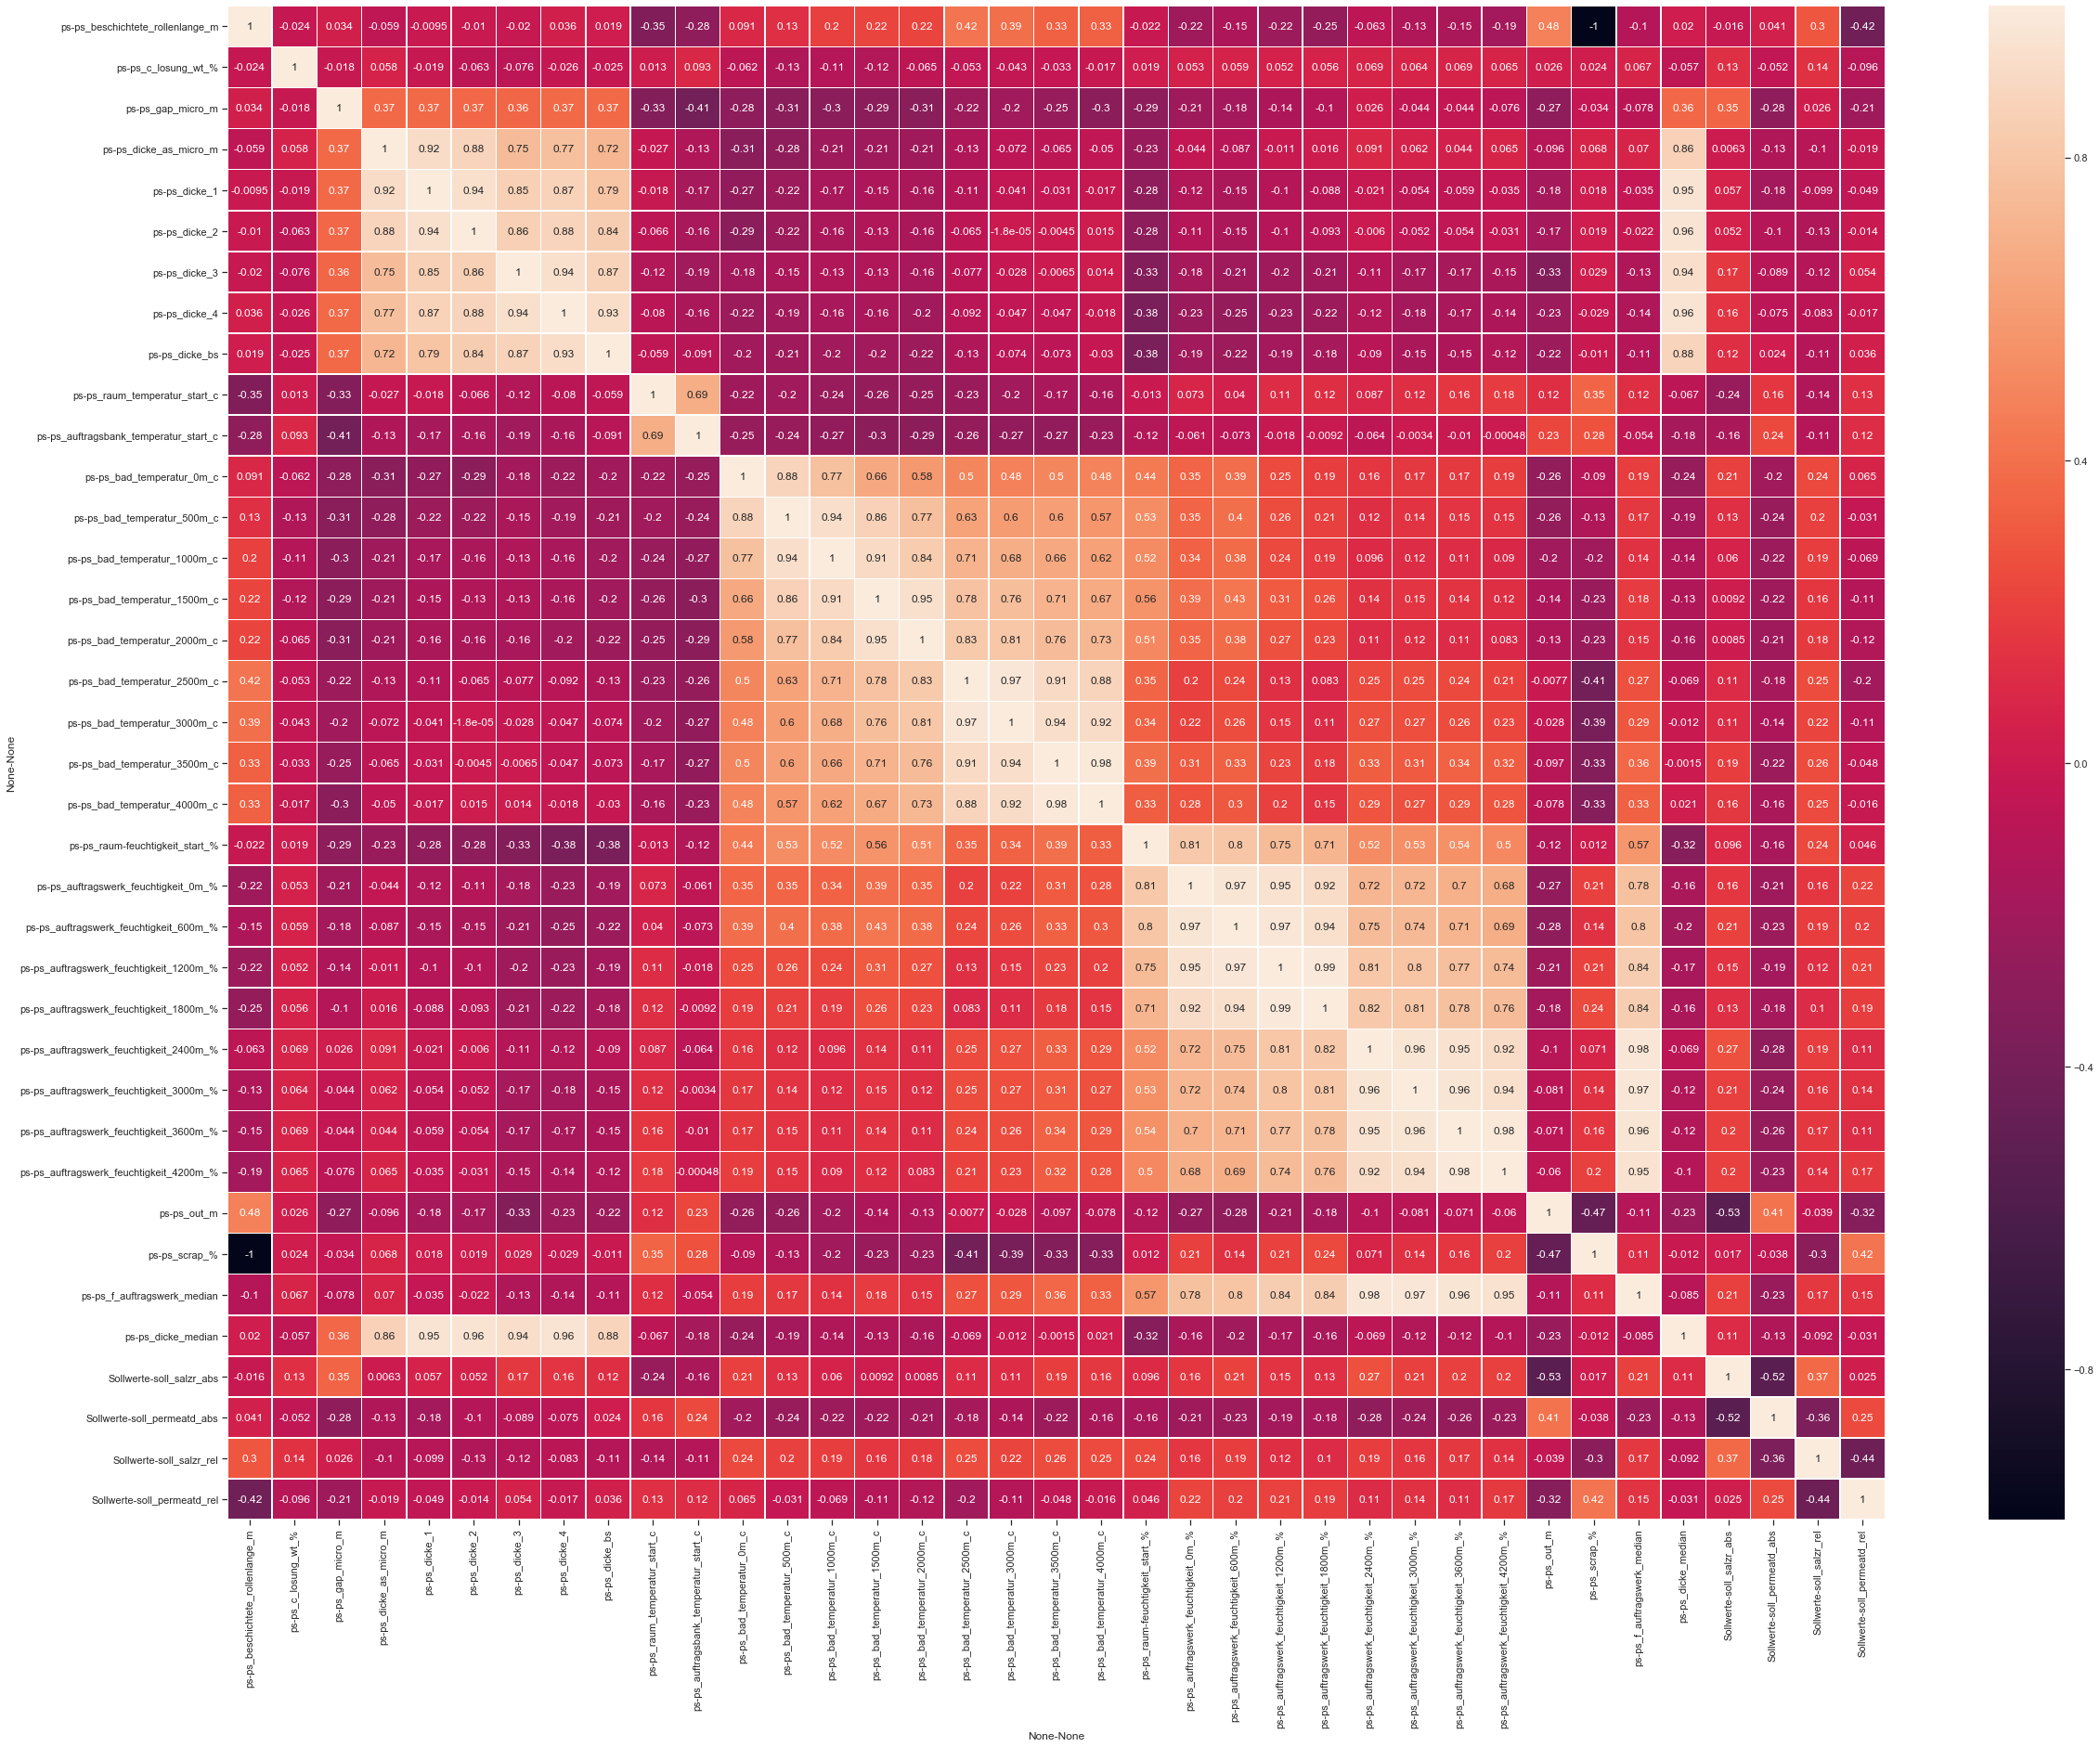

In [95]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_ps.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_ps.pdf')

In [ ]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_pa.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_pa.pdf')

In [97]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_ass.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_ass.pdf')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000233804BB1F8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_qc.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_qc.pdf')

## Fragestellung: relative Abweichung zwischen Soll- und Istwert > 5% für einzelne Produkte. Liegt die Ursache in einer "empfindlichen" Chemie oder in der Technik begründet? -> Erzeugung eines Dentrogrammes, bei größerem Einfluss des Faktors "Chemie" sollten die einzelnen Produkte in einem Dentrogramm nah beeinander gruppiert sein.

### Um unterschiedliche Produkte miteinander vergleichen zu können, müssen Prozessgrößen normiert werden

### Einlesen der Daten

In [98]:
# Daten einlesen
df=pd.read_pickle("./Data/process_data_df11.pkl") #, header=[0,1], na_values=['nan'], sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.copy() # drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

                                                     \
  ps_dicke_4 ps_dicke_bs ps_raum_temperatur_start_c   
0      135.0       134.0                       24.0   
1      135.0       134.0                       24.0   
2      135.0       134.0                       24.0   
3      135.0       134.0                       24.0   
4      135.0       134.0                       24.0   

                                                             \
  ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
0                               19.0                   19.7   
1                               19.0                   19.7   
2                               19.0                   19.7   
3                               19.0                   19.7   
4                               19.0                   19.7   

                                                      \
  ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
0                     20.6                      21.1   
1                     20.6                      21.1   
2                     20.6                      21.1   
3                     20.6                      21.1   
4                     20.6                      21.1   

                                                       \
  ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
0                      21.6                      22.0   
1                      21.6                      22.0   
2                      21.6                      22.0   
3                      21.6                      22.0   
4                      21.6                      22.0   

                                                       \
  ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
0                      22.2                      22.5   
1                      22.2                      22.5   
2                      22.2                      22.5   
3                      22.2                      22.5   
4                      22.2                      22.5   

                                                       \
  ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
0                      22.6                      22.9   
1                      22.6                      22.9   
2                      22.6                      22.9   
3                      22.6                      22.9   
4                      22.6                      22.9   

                                                                  \
  ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
0                         57.0                              78.0   
1                         57.0                              78.0   
2                         57.0                              78.0   
3                         57.0                              78.0   
4                         57.0                              78.0   

                                                        

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118670 entries, 0 to 118686
Columns: 347 entries, (ps, ps) to (Sollwerte, soll_permeatd_rel)
dtypes: bool(7), float64(300), int64(4), object(36)
memory usage: 309.5+ MB


In [100]:
df3=df2.copy()
df3=df3.droplevel(level=0,axis=1)

### Vorbereiten des Datensatzes für die Normierung

#### Entfernen von Spalten, die entweder keine Prozessgrößen während der Produktion waren (_ref, _richtwert) oder in denen keine fehlerhaften/abweichenden Prozessgrößen enthalten sein können (_median)      

In [101]:
df3=df3[df3.columns.drop(list(df3.filter(regex='_ref')))]
df3=df3[df3.columns.drop(list(df3.filter(regex='_richtwert_')))]
df3=df3[df3.columns.drop(list(df3.filter(regex='_median')))]

In [103]:
df4=df3.copy()

#### Entfernen von Spalten, die zwar typ: int oder typ: float sind, deren Normierung jedoch physikalisch nicht sinnvoll ist

In [104]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118670 entries, 0 to 118686
Columns: 312 entries, ps to soll_permeatd_rel
dtypes: bool(7), float64(266), int64(4), object(35)
memory usage: 277.8+ MB


In [105]:
dropList = ['qc_maximalersalzrueckhalt','qc_breite','sc_d_links_anz_max','sc_d_rechts_anz_min',
            'sc_d_rechts_anz_max','qc_barcode_leak_test_values', 'ps','pa_coating','nr','pa_mpda_lsg','pa_chlorlsg','pa_sbs_lsg',
            'pa_alkalilsg','p_product_size','p_effective_area_per_leaf_m2','p_product_type','pp_actual_product',
           'pp_actual_product_short_name','pp_plan_ausbeute_elemente', 'pp_plan_product', 'pp_product_short_name',
           'qc_p_position','roll_position','winding_product_short_name','winding_product_type','assembled_in_elements_m', 'winding_product_line']

df4 = df3.copy()
for i in dropList:
    df4.drop(i, axis = 1, inplace = True)
# qc_maximalersalzruckhalt : just two values 0 and 99.99 
# qc_breite : just two values 985 and 0
# sc_d_links_anz_max : because has 118639 zero values (0.04 % are not zero)
# sc_d_rechts_anz_min : has 118674 (> 99.9%) zeros
# sc_d_rechts_anz_max  : has 118528 (99.9%) zeros
# qc_barcode_leak_test : categorical variable not fully understood
# ps : categorical variable not fully understood
# pa_coating : dummy variable
# nr : not necessary for linear regression
# all ending with lsg : seems to be container numbers for the reaction solution, no details are known about these containers
# p_product_size [1.4646, 1.3914, 0] is a recoding of p_effective_area_per_leaf_m2 [8, 4, 0]
# p_product_full_name : categorical variable, which contains same information as p_product_type
# p_product_type : renamed with more clear name aka B400 ULP, therefore dropped
# all pp_ : are subsets of categorical variables of p_product
# qc_p_position','roll_position','winding_product_short_name','winding_product_type' all categorical variable


#### Mittelung von Spalten, welche dieselbe Prozessgröße innerhalb einer Charge beschreiben, allerdings an unterschiedlichen Positionen gemessen

###### Bsp: pa_air-knife_vor_amin_bad_Xm_%
- Messung erfolgt alle X-Meter
- müsste eigentlich eine Spalte sein, allerdings stimmen die Messpositionen nicht mit denen der Spalte roll_position überein,, welche die Messung einer Charge in der qc beschreibt -> Werte sind deshalb gekippt und kommen über mehrere Spalten vor
- Werte unterscheiden sich innerhalb einer Charge kaum
- Mittelwert hinreichend genau

##### Verfälschen das Ergebnis des Clusterings, da diese Prozessgröße im Vergleich zu einder anderen mehrfach mit berücksichtigt werden würde 


##### Identifizierung einer Charge

In [106]:
df5=df4.copy()

In [107]:
## Liste mit allen Produktnamen für die folgenden Iterationen 
produktnamen=['c807697b3c7e','a79cf6a73839','f22a7fef71c5','c13b2f69d3c1','3e94b7067349','3394d82edc97','df9e75b29918','316c8d1ffca1','5661014763c8','73928f2577b5','22227b31350f','df1d09e643af','e2b1e6e1d5f5','54b98d0fe2eb','ff16223eb2bf','0cc0ba87b12f','a640f68db89c','b3ccc5e5f9b5','2256f65c362b','33d21930e431','3a0c28c7fc8c','630448a85ca3']

In [108]:
# Produktname merken, um zunächst alle produzierte Produkt zu identifizieren
df5=df5.set_index('p_product_full_name')

In [109]:
# Ein Prozessschritt findet jeweils an einem Tag statt -> Vergleich der Daten ermöglicht Chargenidentifizierung
date_format="%Y-%m-%d"


In [110]:
# Iteration mittels iloc -> Herausfinden Nummer der neuen Spalte p_full_name_count
df5['p_full_name_count']="AAAA"
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118670 entries, b3ccc5e5f9b5 to b3ccc5e5f9b5
Columns: 285 entries, ps_datum to p_full_name_count
dtypes: bool(7), float64(250), int64(3), object(25)
memory usage: 253.4+ MB


In [ ]:
# for-Schleife geht nacheinander alle Produkte durch
# while Schleife geht nacheinander alle Reihen durch und vergleicht das Datum -> unterschiedliches Datum <-> unterschiedliche Charge eines Produktes
df_cp=pd.DataFrame()

for name in range(len(produktnamen)):
    
    df_c=df5.loc[produktnamen[name]]
    i=0
    df_c_rows=df_c.shape[0]
    
    while i<df_c_rows:
        
        if i==0:
            
            # j beschreibt, wieviele Chargen eines Produktes bisher identifiziert wurden
            j=1
            df_c.iloc[i,284]=produktnamen[name]+"_"+str(j)
            print(df_c.iloc[i,284])
            
        elif abs((datetime.strptime(df_c.iloc[i]['ps_datum'], date_format)-datetime.strptime(df_c.iloc[i-1]['ps_datum'], date_format)).days)==0:
            df_c.iloc[i,284]=produktnamen[name]+"_"+str(j)
            
        else:
            j=j+1
            df_c.iloc[i,284]=produktnamen[name]+"_"+str(j)
            
        i=i+1
        
    df_cp=df_cp.append(df_c)
    
            
    

C:\Users\PhilippeSamuel\Anaconda3\envs\da_chem\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


c807697b3c7e_1
a79cf6a73839_1
f22a7fef71c5_1
c13b2f69d3c1_1
3e94b7067349_1
3394d82edc97_1
df9e75b29918_1
316c8d1ffca1_1
5661014763c8_1
73928f2577b5_1
22227b31350f_1


In [ ]:
df_cp.to_pickle('./Data/process_data_df12.pkl')

In [ ]:
# df_cp=pd.read_pickle('./Data/process_data_df12.pkl')#, na_values=['nan'],
#sep=',',low_memory=False)

##### Mittelung

In [ ]:
l_prod_count=df_cp['p_full_name_count'].tolist()

In [ ]:
df6=df_cp.copy()

In [ ]:
df6=df6.set_index('p_full_name_count')

In [21]:
l_prod_count2=l_prod_count.copy()

In [22]:
#Duplikate entfernen
l_prod_count2=list(dict.fromkeys(l_prod_count2))

In [23]:
# Multiple Measurment columns
meanList = ['pa_cm-pda','pa_chlorkonzentration','pa_air-knife_vor_amin_bad','airknife_vor_amin_trockner',
            'pa_amin-trockner_feuchtigkeit_danfugt_bs','pa_amin-trockner_feuchtigkeit_danfugt_as','pa_amin-trockner_feuchtigkeit_cofely',
            'ps_dicke','ps_bad_temperatur','ps_auftragswerk_feuchtigkeit','sc_d_links_werte','sc_d_rechts_werte']


# Funktion to drop multiple measurment values
def MeanColumnCreate(meanList, df):
    for i in meanList:
        filterdf = df.filter(regex = i)
        name = i+"_mean"
        df.loc[:,name] = filterdf.mean(axis = 1)
        df.drop(filterdf, axis = 1, inplace = True)



In [24]:
df_mean=pd.DataFrame()

for charge in range(len(l_prod_count2)):
    df_c=df6.loc[l_prod_count2[charge]]
    MeanColumnCreate(meanList, df_c)
    df_mean=df_mean.append(df_c)

/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df_mean

,p_product_full_name,ps_datum,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_datum_coating,ps_out_m,...,pa_air-knife_vor_amin_bad_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,sc_d_links_werte_mean,sc_d_rechts_werte_mean
p_full_name_count,,,,,,,,,,,,,,,,,,,,,
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630448a85ca3_48,630448a85ca3,2018-11-12,4519.0,31.0,250.0,24.0,18.0,50.0,2018-11-11,4519.0,...,90.0,44.375,57.2,55.4,74.9375,134.666667,22.644444,60.000,192.860001,190.891999
630448a85ca3_48,630448a85ca3,2018-11-12,4519.0,31.0,250.0,24.0,18.0,50.0,2018-11-11,4519.0,...,90.0,44.375,57.2,55.4,74.9375,134.666667,22.644444,60.000,193.117999,191.777001
630448a85ca3_48,630448a85ca3,2018-11-12,4519.0,31.0,250.0,24.0,18.0,50.0,2018-11-11,4519.0,...,90.0,44.375,57.2,55.4,74.9375,134.666667,22.644444,60.000,193.311000,191.600001


In [26]:
df_mean.to_csv('process_data_df13.csv')

In [3]:
df_mean=pd.read_csv("process_data_df13.csv", na_values=['nan'],
sep=',',low_memory=False)

In [4]:
df7=df_mean.copy()

In [5]:
df7=df_mean.set_index('p_full_name_count')

#### Typfilterung

In [6]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118654 entries, c807697b3c7e_1 to 630448a85ca3_48
Columns: 182 entries, p_product_full_name to sc_d_rechts_werte_mean
dtypes: bool(7), float64(147), int64(3), object(25)
memory usage: 160.1+ MB


In [7]:
# alle Prozessgrößen müssen Zahlen (int, float) sein
# Entfernen von allem, was keine Zahl ist

df7=df7.select_dtypes(include=['float64','int']) 

In [8]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118654 entries, c807697b3c7e_1 to 630448a85ca3_48
Columns: 150 entries, ps_beschichtete_rollenlange_m to sc_d_rechts_werte_mean
dtypes: float64(147), int64(3)
memory usage: 136.7+ MB


### Normierung

In [9]:
# Liste mit allem Produktnamen 
# -> dient als Filter für Iteration
#produktnamen=['a79cf6a73839']
produktnamen=['a79cf6a73839','c807697b3c7e','f22a7fef71c5','c13b2f69d3c1','3e94b7067349','3394d82edc97','df9e75b29918','316c8d1ffca1','5661014763c8','73928f2577b5','22227b31350f','df1d09e643af','e2b1e6e1d5f5','54b98d0fe2eb','ff16223eb2bf','0cc0ba87b12f','a640f68db89c','b3ccc5e5f9b5','2256f65c362b','33d21930e431','3a0c28c7fc8c','630448a85ca3']

In [10]:
# Erzeugen eines leeren DataFrames, in welches die normierten Werte eingetragen werden
df_norm=pd.DataFrame()

for i in range(len(produktnamen)):
    
    # 1.Filtern nach Produktname und Erzeugen eines DataFrames, in welchem die Normierung erfolgt
    # !! Index ändert sich !!
    #to_norm=df3['p_product_full_name']==produktnamen[i]
    #df_n=df3[to_norm]
    df_n=df7.filter(like=produktnamen[i],axis=0)
    
    # 2. Merken von Größen, welche nicht normieret werden können (product_name) oder es bereits sind (relative Werte)
    # !! Gleicher Index für diese Größen für df_n und df_n2 
    #  -> können später problemlos wieder angefügt werden
    df_n2=df_n.copy()
    df_n=df_n.drop(columns=['soll_salzr_rel', 'soll_permeatd_rel'])
    
    # Wahl der Normierungsmethode
    # !! Normierung jeweils füra alle Chargen eines Produktes !! Einheitliche Bedingungen für ein Produkt
    df_n=(df_n-df_n.min())/(df_n.max()-df_n.min())
    #df_n=(df_n-df_n.mean())/df_n.std()
    
    # Anfügen der Größen, welche nicht normiert werden sollen
    # sowie sukzessives Einfügen der normierten DataFrames in das leere DataFrame df_norm
    
    df_n['soll_salzr_rel']=df_n2['soll_salzr_rel']
    df_n['soll_permeatd_rel']=df_n2['soll_permeatd_rel']
    
    df_norm=df_norm.append(df_n, ignore_index=False)
    

In [11]:
df8=df_norm.copy()

In [12]:
# Filtert man das DataFrame nach den verschiedenen Produktname, treten Konstanten Spalten auf (z.B. ps_c_losung_wt_%)
# -> Annahme: Es handelt sich dabei um spezifische Vorgaben für die Produktion eines jeweiligen Produktes (weil sie eben nicht über im kompletten DataFrame konstant sind)
# -> Erzeugen NaN-Einträge, da beim Normieren durch 0 geteilt wird (df_n.max()=df_n.min())
#  -> Müssen Entfernt werden, da uns Schwankungen einzelner Prozessgrößen innerhalb eines Produktes interessieren

df8=df8.dropna(axis='columns', how='any')

In [13]:
df8

,ps_beschichtete_rollenlange_m,ps_out_m,ps_scrap_%,pa_beschichtete_rollenlange_m,pa_raum_temperatur_start_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_raum_feuchte_start_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,...,pa_chlorkonzentration_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,soll_salzr_rel,soll_permeatd_rel
p_full_name_count,,,,,,,,,,,,,,,,,,,,,
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-2.035380,0.347577
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.966820,2.898316
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-3.131341,12.516333
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.693424,8.603211
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-2.003954,11.640462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630448a85ca3_48,0.988792,0.99644,0.011208,0.964769,0.0,0.207547,0.047619,0.210526,0.038889,0.380952,...,0.859244,0.34551,0.484277,0.552448,0.857632,0.439024,0.505935,0.441472,-0.903685,20.371214
630448a85ca3_48,0.988792,0.99644,0.011208,0.964769,0.0,0.207547,0.047619,0.210526,0.038889,0.380952,...,0.859244,0.34551,0.484277,0.552448,0.857632,0.439024,0.505935,0.441472,-0.940636,19.929047
630448a85ca3_48,0.988792,0.99644,0.011208,0.964769,0.0,0.207547,0.047619,0.210526,0.038889,0.380952,...,0.859244,0.34551,0.484277,0.552448,0.857632,0.439024,0.505935,0.441472,-0.967149,20.282138


### Auswählen der Daten und Erzeugung eines Dentrogrammes

#### Salzrückhalt

##### Filterkriterium

In [15]:
df9=df8[(df8['soll_salzr_rel']<-10) & (df8['soll_salzr_rel']>-100)]

In [18]:
# Jeder 1000 Eintrag hat eine Abweichung größer als 10%
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, a79cf6a73839_1 to 630448a85ca3_40
Data columns (total 57 columns):
ps_beschichtete_rollenlange_m                          148 non-null float64
ps_out_m                                               148 non-null float64
ps_scrap_%                                             148 non-null float64
pa_beschichtete_rollenlange_m                          148 non-null float64
pa_raum_temperatur_start_c                             148 non-null float64
pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c    148 non-null float64
pa_temperatur_alkali-lsg_chem_vorbereitung_start_c     148 non-null float64
pa_raum_feuchte_start_%                                148 non-null float64
pa_vertikale_feuchte_oben_start_%                      148 non-null float64
pa_vertikale_feuchte_oben_mitte_%                      148 non-null float64
pa_ndecan/tmc                                          148 non-null float64
pa_out_m                               

In [19]:
df9=df9.reset_index()
prod_appearance=df9['p_full_name_count'].tolist()
df9

,p_full_name_count,ps_beschichtete_rollenlange_m,ps_out_m,ps_scrap_%,pa_beschichtete_rollenlange_m,pa_raum_temperatur_start_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_raum_feuchte_start_%,pa_vertikale_feuchte_oben_start_%,...,pa_chlorkonzentration_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,soll_salzr_rel,soll_permeatd_rel
0,a79cf6a73839_1,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-10.202955,26.755614
1,a79cf6a73839_2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-11.273586,17.567683
2,a79cf6a73839_2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-10.195526,23.245699
3,a79cf6a73839_2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-10.342399,49.301204
4,a79cf6a73839_2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-13.212388,46.814078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,630448a85ca3_3,0.915318,0.973101,0.084682,0.954117,0.666667,0.811321,0.714286,0.315789,0.047222,...,0.854469,0.657534,0.597484,0.699301,0.860485,0.585366,0.385757,0.431438,-21.330592,30.662923
144,630448a85ca3_10,0.971357,0.990902,0.028643,0.959033,0.666667,0.962264,0.523810,0.921053,0.069444,...,0.748090,0.048706,0.937107,0.811189,0.976890,0.219512,0.494065,0.986622,-23.997222,31.489360
145,630448a85ca3_22,0.983811,0.994858,0.016189,0.980746,0.666667,0.767925,0.680952,0.000000,0.008333,...,0.797555,0.649924,0.559748,0.727273,0.878745,0.829268,0.373887,0.481605,-86.857281,92.937199
146,630448a85ca3_30,0.845579,0.950949,0.154421,0.941827,0.833333,0.358491,0.757143,0.131579,0.038889,...,0.890565,0.596651,0.578616,0.755245,0.853923,0.439024,0.385757,0.525084,-26.456081,35.044016


In [20]:
df9=df9.drop(['p_full_name_count'], axis=1)
df_norm_dendro=df9.to_numpy()
df_norm_dendro

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.02029547e+01,  2.67556143e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -1.12735865e+01,  1.75676827e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -1.01955265e+01,  2.32456985e+01],
       ...,
       [ 9.83810710e-01,  9.94857595e-01,  1.61892902e-02, ...,
         4.81605351e-01, -8.68572806e+01,  9.29371991e+01],
       [ 8.45579078e-01,  9.50949367e-01,  1.54420922e-01, ...,
         5.25083612e-01, -2.64560811e+01,  3.50440159e+01],
       [ 9.40224159e-01,  9.81012658e-01,  5.97758406e-02, ...,
         4.81605351e-01, -8.49639171e+01,  7.01543564e+01]])

In [21]:
mergings=linkage(df_norm_dendro, method='complete')

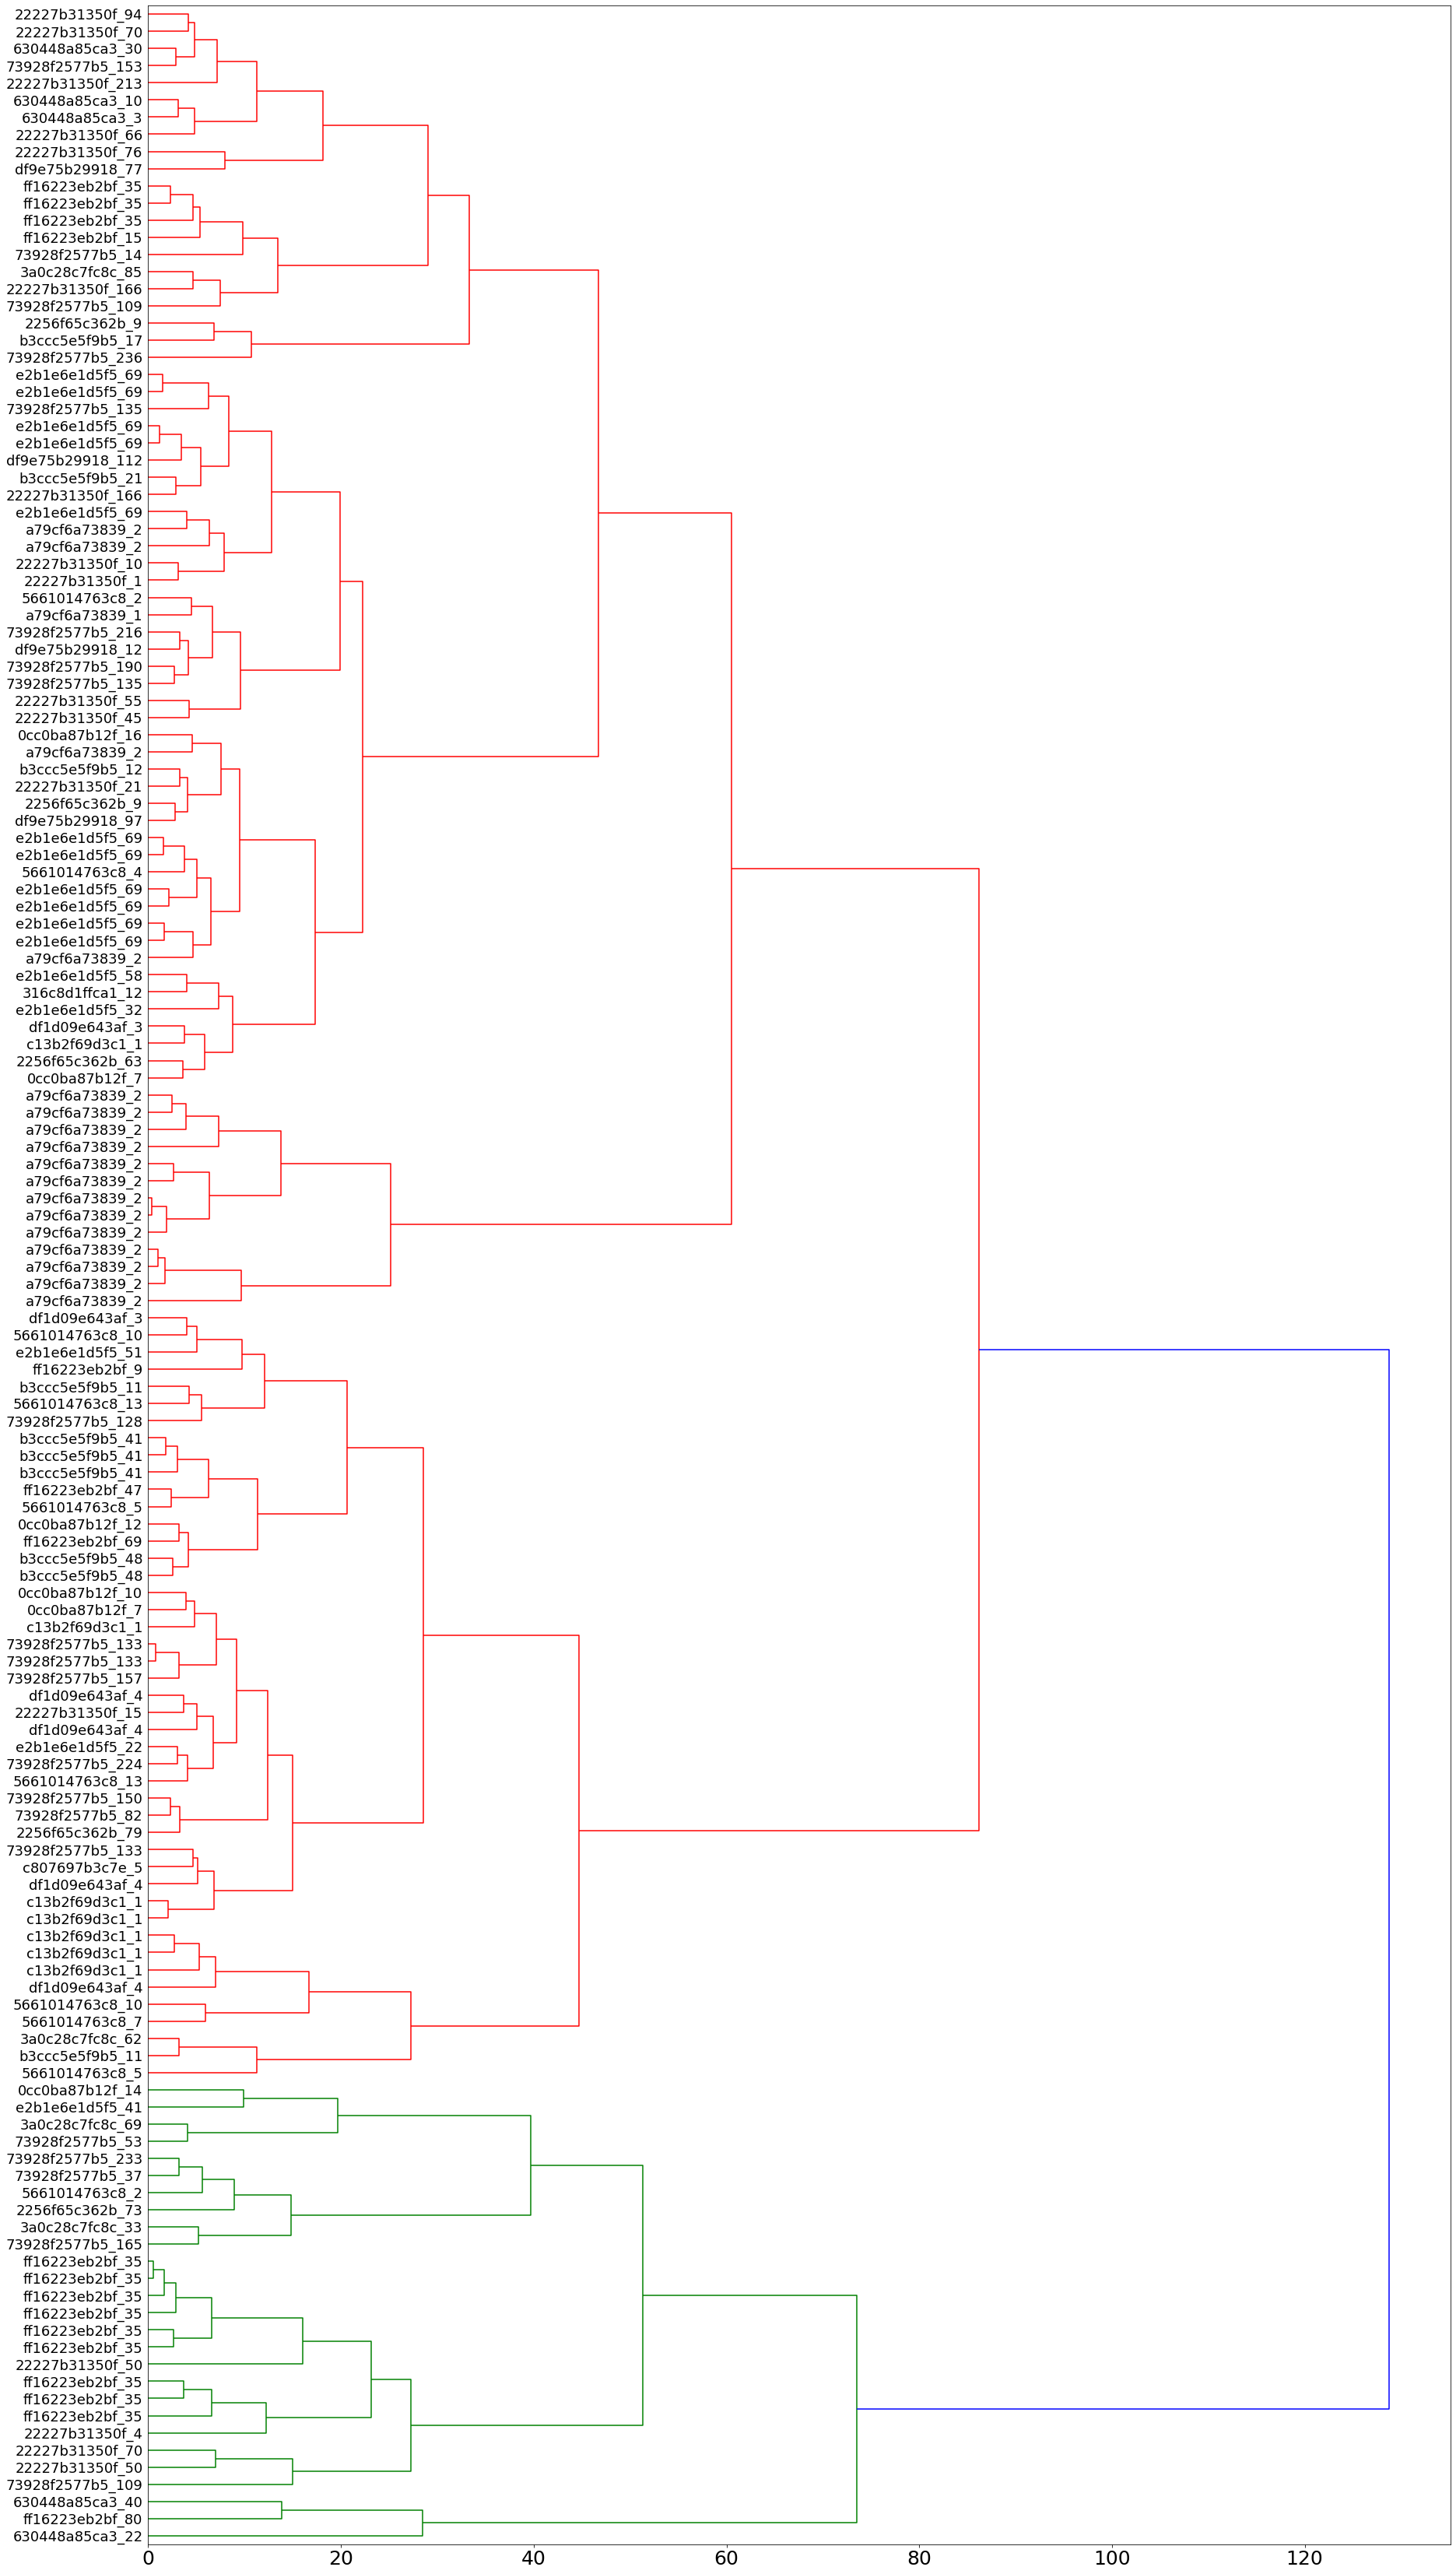

In [22]:
plt.figure(figsize=(30,60))
p=dendrogram(mergings,labels=prod_appearance, leaf_rotation=0, leaf_font_size=26, orientation='right')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=25)
ax.tick_params(axis='y', which='major', labelsize=18)
plt.savefig('dendro_norm.pdf')

In [23]:
# Einzelne Produkte werden abwechselt produziert
# Bei einem schlecht funktionierenden Trockner würden sich auch für das darauf folgende Produkt Abweichungen ergeben
# Bei fehlerhafte Produktionsbedingungen wären die Chargen der normierten Produkte untereinader gestreut verteilt, da Abweichungen auch für die darauffolgenden anderen produzierten Produkte gelten würden  
## Das übrige Dendrogramm zeigt keine Auffälligkeiten, die Ursache für die Abweichungen sind nicht an fehlerhaften Prozessbedingungen festzumachen